In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [11]:
# drop unnecessary column 
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace =True)

In [15]:
df.head()

df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

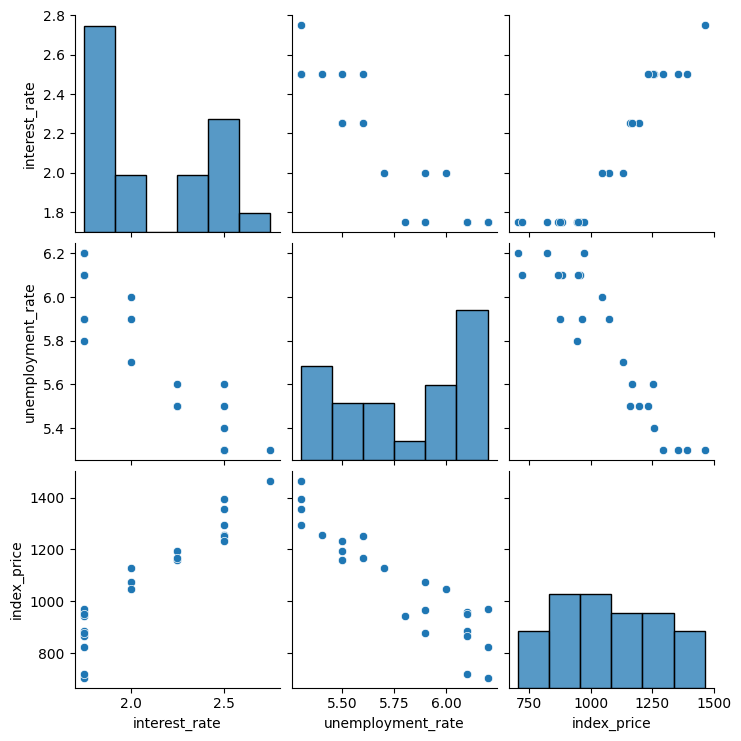

In [18]:
## Let's do some visualization 
import seaborn as sns
sns.pairplot(df)

In [20]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

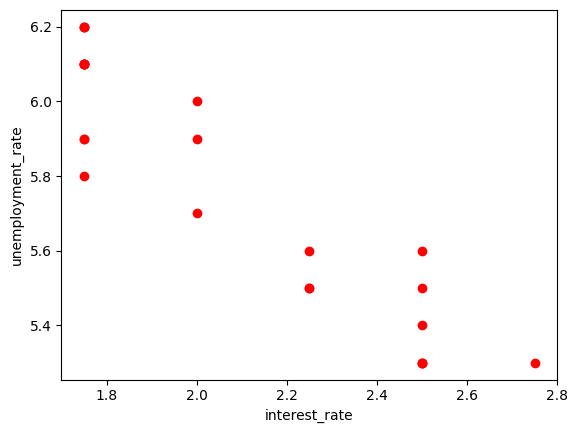

In [37]:
## visualizing the data points
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [27]:
## independent and dependent features

x = df[['interest_rate','unemployment_rate']]
y= df.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.25,random_state=42)

In [38]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

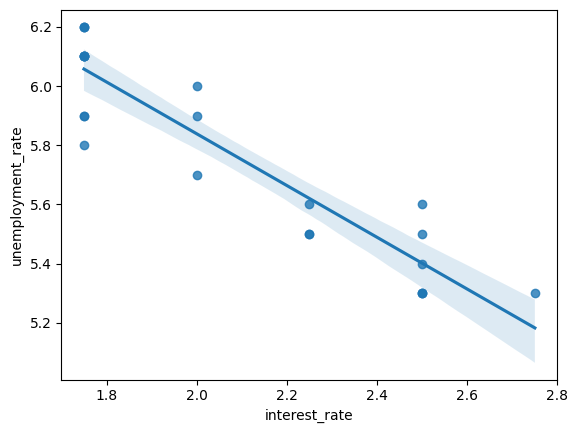

In [42]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])

In [43]:
from sklearn.preprocessing import StandardScaler


In [44]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [48]:
regression.fit(x_train,y_train)

LinearRegression()

In [50]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)